<a href="https://colab.research.google.com/github/Raanank10/Instagram-s-influencers/blob/raanan_03_10/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram_influencers**

# Global Parameters

In [556]:
path_part0 = 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/ai_posts_analysis_data.xlsx'
fname = 'ai_posts_analysis_data.xlsx'
# fname = 'https://github.com/Raanank10/Instagram-s-influencers/blob/ai_posts_analysis_data.xlsx'
# fname = 'https://github.com/Raanank10/Instagram-s-influencers/blob/main/ai_posts_analysis_data.xlsx'

path_part1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part1.csv'
path_part2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part2.csv'

train_size = 0.75
rand_state = 990
sigma = 3
Min_followers = 500

In [557]:
# Bining
bin_labels=['Low','Medium','High', 'Very High','Extreme']

# Get the Data

In [558]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno
import xgboost as xgb

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report # elad 20210708
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import OrdinalEncoder # elad 20210911

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

## Concate the 2 files: --Start

In [559]:
df_part0 = pd.read_csv(path_part0, index_col=0)  
df_part0.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,36193140327,elastici_e_passamaneria,Elastici e Passamaneria,1052,2530600951335029174,CMegChUlwm2,23,0,2.19,https://www.instagram.com/p/CMegChUlwm2,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,NaN,NaN,NaN,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,https://instagram.fdok2-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/160374486_2823675294516254_158720847037227315_n.jpg?tp=1&_nc_ht=instagram.fdok2-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=fXOFeWEt3dcAX9moTcA&edm=ABfd0MgBAAAA&ccb=7-4&oh=cc36e9f840bc93314fcc9e76c9e4b8c6&oe=60DA4B27&_nc_sid=7bff83,no,no,no,NaN,NaN
1919,8210198494,pamela.latorre.73,Pamela La Torre,309,2595285287724490476,CQETjgBnZ7s,55,23,25.24,https://www.instagram.com/p/CQETjgBnZ7s,"Photo by Pamela La Torre on June 13, 2021. May be an image of one or more people, people standing and indoor.",Prima comunione Giorgio,Santissimo Crocifisso,"Taranto, Italy",NaN,1623602137,"Person, Human, Photographer, Photography, Photo, Furniture, Shoe, Clothing, Footwear, Apparel, Interior Design, Indoors",news,arts_entertainment,style_fashion,https://instagram.fhel3-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/131454075_203114518334788_1962979990399529842_n.jpg?tp=1&_nc_ht=instagram.fhel3-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=XmsE8bbC2cIAX-0rYFU&edm=ABfd0MgBAAAA&ccb=7-4&oh=4ca96de8a58eafc0ac1e2eea47d28236&oe=60D9DF1A&_nc_sid=7bff83,no,no,no,NaN,NaN


In [560]:
df_part1 = pd.read_csv(path_part1, index_col=0)  
df_part1.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,47655063851,_color_pal_ette,Asty,17,2.660000e+18,CTegsqAhtEs,959,0,5641.18,https://www.instagram.com/p/CTegsqAhtEs,NaN,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,NaN,NaN,NaN,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,NaN,travel,https://scontent-hel3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.280.720.720a/s640x640/241390863_566725341049399_4464518408404712824_n.jpg?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=ha3byVQANRAAX9uFuw8&edm=ABfd0MgBAAAA&ccb=7-4&oh=7b839f77160e3de879662df045a33628&oe=614DDB58&_nc_sid=7bff83,no,yes,yes,https://scontent-hel3-1.cdninstagram.com/v/t50.2886-16/241355135_2968650116724302_9211268511392989112_n.mp4?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=102&_nc_ohc=lfaZh608M8YAX-ejoCg&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DC35A&oh=d7c047911961f8e5a4e841daceb2dddc&_nc_sid=7bff83,1872.0
31286,47448521201,gigimakeup25,Gilliam Ibáñez ???????? makeup,157,2.660000e+18,CTsfWCeFunb,30,2147,1386.62,https://www.instagram.com/p/CTsfWCeFunb,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",NaN,NaN,NaN,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,https://instagram.frix2-1.fna.fbcdn.net/v/t51.2885-15/e35/241739897_285537473018070_6208727686952352391_n.jpg?_nc_ht=instagram.frix2-1.fna.fbcdn.net&_nc_cat=106&_nc_ohc=VVj13OvSavsAX_jLTaF&edm=ABfd0MgBAAAA&ccb=7-4&oh=29790167523b714e288148d65d3d0ce1&oe=6151B61D&_nc_sid=7bff83,no,no,no,NaN,NaN


In [561]:
df_part2 = pd.read_csv(path_part2, index_col=0)  
df_part2.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
25807,40005237207,byeonggil6734,ç ‚å²¡????????????,717,2.550000e+18,CNfe10KrHnr,31,0,4.32,https://www.instagram.com/p/CNfe10KrHnr,"Photo by ç ‚å²¡???????????? on April 10, 2021. May be an image of 1 person, beard, sitting and indoor.",ì£¼ë§ì—ëŠ” í•˜ë£¨ ìˆ˜ê³ í–ˆìŠµë‹ˆë‹¤ ë¶€ì‚°ì—ì„œ,NaN,NaN,NaN,1618071572,"Chair, Furniture, Couch, Skin, Clothing, Apparel, Person, Human, Sitting, Cushion, Footwear, Indoors, Hat, Living Room, Room, Shoe, Armchair",education,arts_entertainment,style_fashion,https://instagram.fixb1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/170910814_741739049702462_4206717608969572137_n.jpg?_nc_ht=instagram.fixb1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=a_5hpwC8mPsAX-S9s57&edm=ABfd0MgBAAAA&ccb=7-4&oh=7cbf9bf3791389688cdba4a7825ca78d&oe=6152D144&_nc_sid=7bff83,yes,no,no,NaN,NaN
27121,17931150200,hitmanmikey,mikey_BANGZ,6182,2.650000e+18,CS5ZWqFD3uv,242,25,4.32,https://www.instagram.com/p/CS5ZWqFD3uv,NaN,"(5-Step #Drill - #SubJazz Version)\n\n142 BPM in G Minor\n\nISRC# QZJUN2108076\n\nFor complete information regarding the production timeline of this instrumental, an electronic press kit or for writers/artists/visual content creators who desire custom created sound-beds to help you tell a story:\n\nofficial email: mikey@hitmanmikey.com\n\nUntagged Mastered .WAV & .MP3 Files / Stems and Customized Versions / Custom Requests available @:\n\nhttps://www.hitmanmikey.com/beat/mannastihl-9053229\n\n#instrumentals #",NaN,NaN,NaN,1629678866,"Poster, Advertisement, Symbol, Emblem, Logo, Trademark",arts_entertainment,NaN,business,https://instagram.fcvj4-1.fna.fbcdn.net/v/t51.2885-15/e15/240439053_577407736769807_3660906977618921919_n.jpg?_nc_ht=instagram.fcvj4-1.fna.fbcdn.net&_nc_cat=111&_nc_ohc=FMrS8eaM3c4AX_j7uZQ&edm=ABfd0MgBAAAA&ccb=7-4&oh=d1f706d41034056efc58ff0636f706d1&oe=614D92FF&_nc_sid=7bff83,no,yes,yes,https://instagram.fcvj4-1.fna.fbcdn.net/v/t50.2886-16/10000000_260626065677205_8633015125519467545_n.mp4?_nc_ht=instagram.fcvj4-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=9SPqvkLxzpcAX8oScWV&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DFD4D&oh=de4d9725e550a279f140d3d260345122&_nc_sid=7bff83,3456.0


In [562]:
df = pd.concat([df_part0, df_part1, df_part2])

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40849 entries, 1918 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          40849 non-null  int64  
 1   USERNAME                        40849 non-null  object 
 2   FULLNAME                        39489 non-null  object 
 3   FOLLOWER                        40849 non-null  int64  
 4   POST ID                         40849 non-null  float64
 5   SHORTCODE                       40849 non-null  object 
 6   LIKES                           40849 non-null  int64  
 7   COMMENTS                        40849 non-null  int64  
 8   ENGAGEMENT                      40849 non-null  float64
 9   URL                             40849 non-null  object 
 10  ACCESSIBILITY CAPTION           33725 non-null  object 
 11  CAPTION                         34786 non-null  object 
 12  LOCATION                     

##Concate the 2 files: --> End

In [564]:
df = df[~df.index.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 1918 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                     

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 1918 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                     

# EDA

Column names: Replace white spaces with underscore 

In [566]:
df.columns = df.columns.str.replace(' ', '_')

Check for each column how many unique is there (lenght of the dataset 4792, len(df)) 

In [567]:
df.apply(lambda col: len(col.unique())).sort_values(ascending=False)

IMAGE_URL                         36057
URL                               35946
SHORTCODE                         35939
TIME                              35911
IMAGE_LABELS                      34482
CAPTION                           28977
ACCESSIBILITY_CAPTION             28035
VIDEO_URL                          5846
POST_ID                            5018
LOCATION                           4870
ENGAGEMENT                         3615
USERNAME                           3489
USERID                             3489
FULLNAME                           3478
CITY                               2733
FOLLOWER                           2032
VIDEO_VIEW_COUNT                   1583
LIKES                              1535
COMMENTS                            313
COUNTRY                             121
CAPTION_INTEREST                     37
IMAGE_LABEL_INTEREST                 37
ACCESSIBILITY_CAPTION_INTEREST       31
COMMENT_DISABLED                      2
IS_VIDEO                              2


## Data Cleaning

In [568]:
# Descriptive statistics for each column
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT
count,3.605700e+04,3.605700e+04,3.605700e+04,3.605700e+04,36057.000000,36057.000000,3.605700e+04,5.847000e+03
mean,1.652492e+10,3.293115e+04,2.519419e+18,6.299581e+02,18.933161,8.498093,1.614549e+09,1.021531e+04
std,1.801686e+10,7.925535e+05,2.402531e+17,1.776770e+04,553.617212,34.940211,2.863973e+07,1.939191e+05
min,3.142160e+05,1.000000e+00,1.029034e+08,0.000000e+00,0.000000,0.000000,1.308680e+09,0.000000e+00
25%,1.503729e+09,2.790000e+02,2.510000e+18,1.200000e+01,0.000000,1.780000,1.613306e+09,5.100000e+01
50%,7.069489e+09,7.820000e+02,2.600000e+18,3.100000e+01,1.000000,4.550000,1.624265e+09,1.560000e+02
75%,3.456841e+10,2.177000e+03,2.650000e+18,8.300000e+01,6.000000,10.020000,1.630453e+09,4.985000e+02
max,4.974023e+10,3.636130e+07,2.670000e+18,1.409732e+06,73188.000000,5641.180000,1.632341e+09,9.785071e+06


In [569]:
df = df[df.FOLLOWER >= Min_followers]

In [570]:
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT
count,2.212300e+04,2.212300e+04,2.212300e+04,2.212300e+04,22123.000000,22123.000000,2.212300e+04,4.093000e+03
mean,1.294732e+10,5.353148e+04,2.560923e+18,1.012033e+03,29.686932,5.444202,1.619499e+09,1.448958e+04
std,1.635346e+10,1.011282e+06,1.702821e+17,2.267501e+04,706.415323,7.577142,2.029269e+07,2.316489e+05
min,3.142160e+05,5.000000e+02,6.216878e+17,0.000000e+00,0.000000,0.000000,1.388331e+09,0.000000e+00
25%,5.652381e+08,9.180000e+02,2.560000e+18,2.300000e+01,0.000000,1.270000,1.619573e+09,9.400000e+01
50%,4.459829e+09,1.616000e+03,2.610000e+18,5.700000e+01,3.000000,3.140000,1.624838e+09,2.350000e+02
75%,2.290415e+10,4.140000e+03,2.650000e+18,1.360000e+02,10.000000,6.960000,1.630711e+09,7.290000e+02
max,4.944817e+10,3.636130e+07,2.670000e+18,1.409732e+06,73188.000000,338.740000,1.632341e+09,9.785071e+06


In [571]:
df = df[df['ENGAGEMENT'].notna()]
print(f'data len = {len(df)}')

data len = 22123


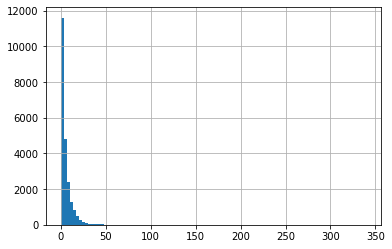

In [572]:
df.ENGAGEMENT.hist(bins=100)

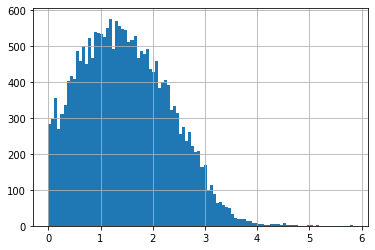

In [573]:
log_ENGAGEMENT = np.log1p(df.ENGAGEMENT)
log_ENGAGEMENT.hist(bins=100)

In [574]:
df['log_ENGAGEMENT'] = log_ENGAGEMENT

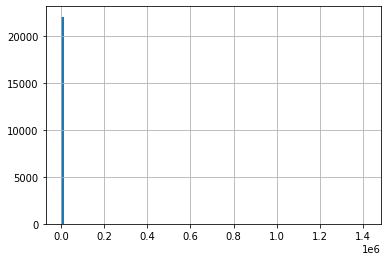

In [575]:
df.LIKES.hist(bins=100)

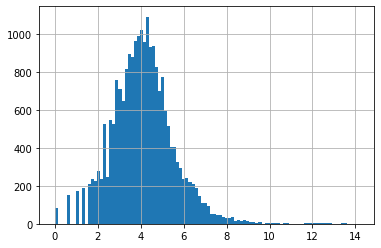

In [576]:
log_LIKES = np.log1p(df.LIKES)
log_LIKES.hist(bins=100)

In [577]:
df['log_LIKES'] = log_LIKES

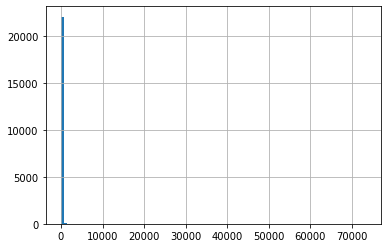

In [578]:
df.COMMENTS.hist(bins=100)

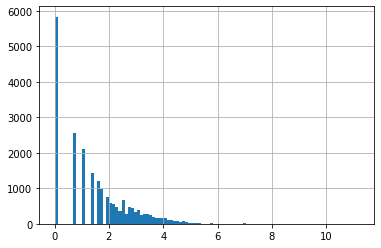

In [579]:
log_COMMENTS = np.log1p(df.COMMENTS)
log_COMMENTS.hist(bins=100)

In [580]:
df['log_COMMENTS'] = log_COMMENTS

## Sigma cleaning

In [581]:
# # we lose the most viral posts and most unviral posts
# for col in df.columns:
#     if df[col].dtype == 'float64':
#         std = df[col].std()
#         ave = df[col].mean()
#         df = df.loc[df[col].between\
#                                (ave - (sigma * std), ave + (sigma * std))] 
#         print(f'Processing {col:10} --> {df.shape[0]:5} entities entries remain')

In [582]:
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT,log_ENGAGEMENT,log_LIKES,log_COMMENTS
count,2.212300e+04,2.212300e+04,2.212300e+04,2.212300e+04,22123.000000,22123.000000,2.212300e+04,4.093000e+03,22123.000000,22123.000000,22123.000000
mean,1.294732e+10,5.353148e+04,2.560923e+18,1.012033e+03,29.686932,5.444202,1.619499e+09,1.448958e+04,1.481362,4.117498,1.515258
std,1.635346e+10,1.011282e+06,1.702821e+17,2.267501e+04,706.415323,7.577142,2.029269e+07,2.316489e+05,0.839813,1.445193,1.335125
min,3.142160e+05,5.000000e+02,6.216878e+17,0.000000e+00,0.000000,0.000000,1.388331e+09,0.000000e+00,0.000000,0.000000,0.000000
25%,5.652381e+08,9.180000e+02,2.560000e+18,2.300000e+01,0.000000,1.270000,1.619573e+09,9.400000e+01,0.819780,3.178054,0.000000
50%,4.459829e+09,1.616000e+03,2.610000e+18,5.700000e+01,3.000000,3.140000,1.624838e+09,2.350000e+02,1.420696,4.060443,1.386294
75%,2.290415e+10,4.140000e+03,2.650000e+18,1.360000e+02,10.000000,6.960000,1.630711e+09,7.290000e+02,2.074429,4.919981,2.397895
max,4.944817e+10,3.636130e+07,2.670000e+18,1.409732e+06,73188.000000,338.740000,1.632341e+09,9.785071e+06,5.828181,14.158911,11.200800


## Handle NaN valus

How Many NaN values are ther in the datast?

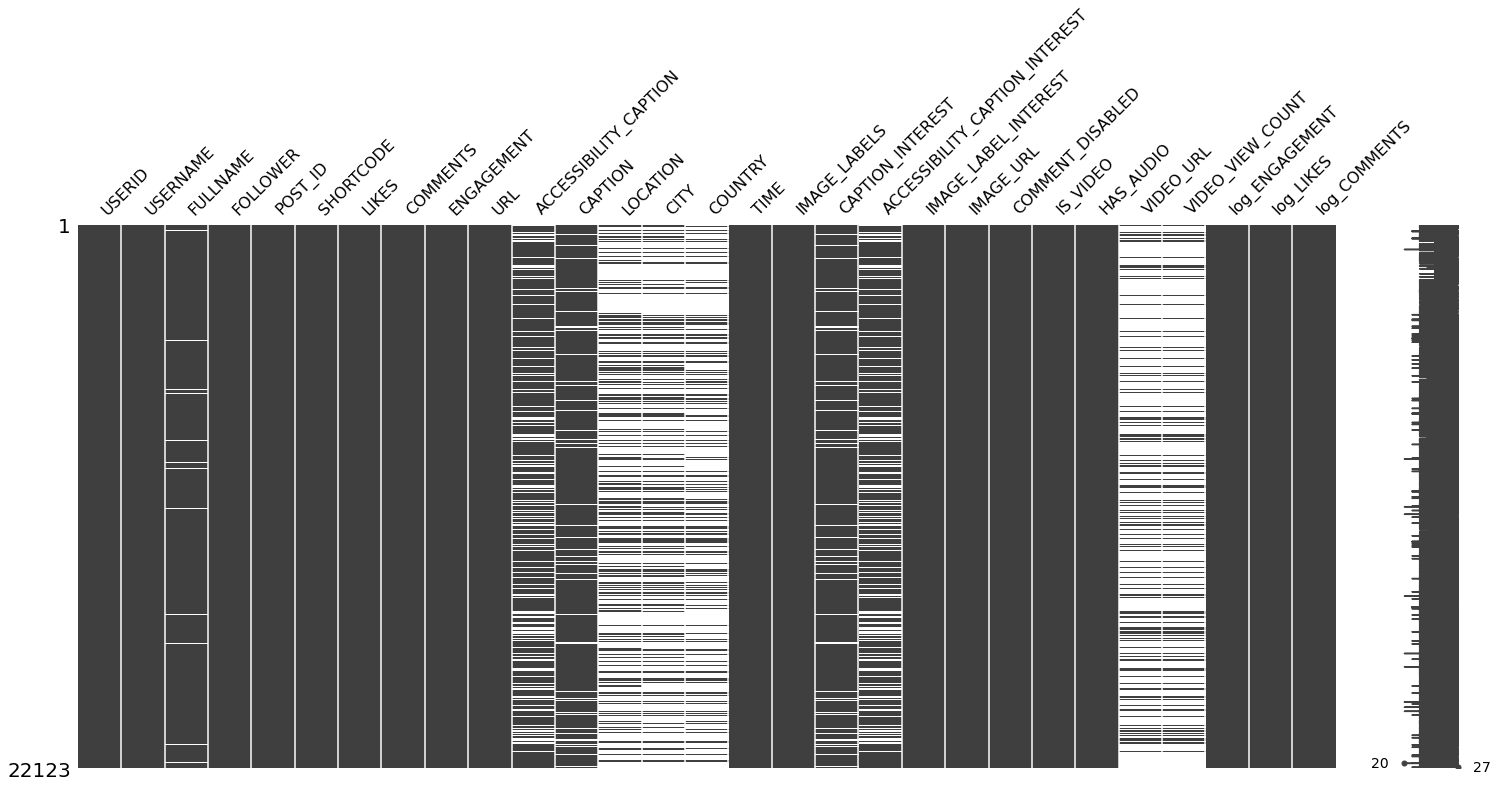

In [583]:
msno.matrix(df)

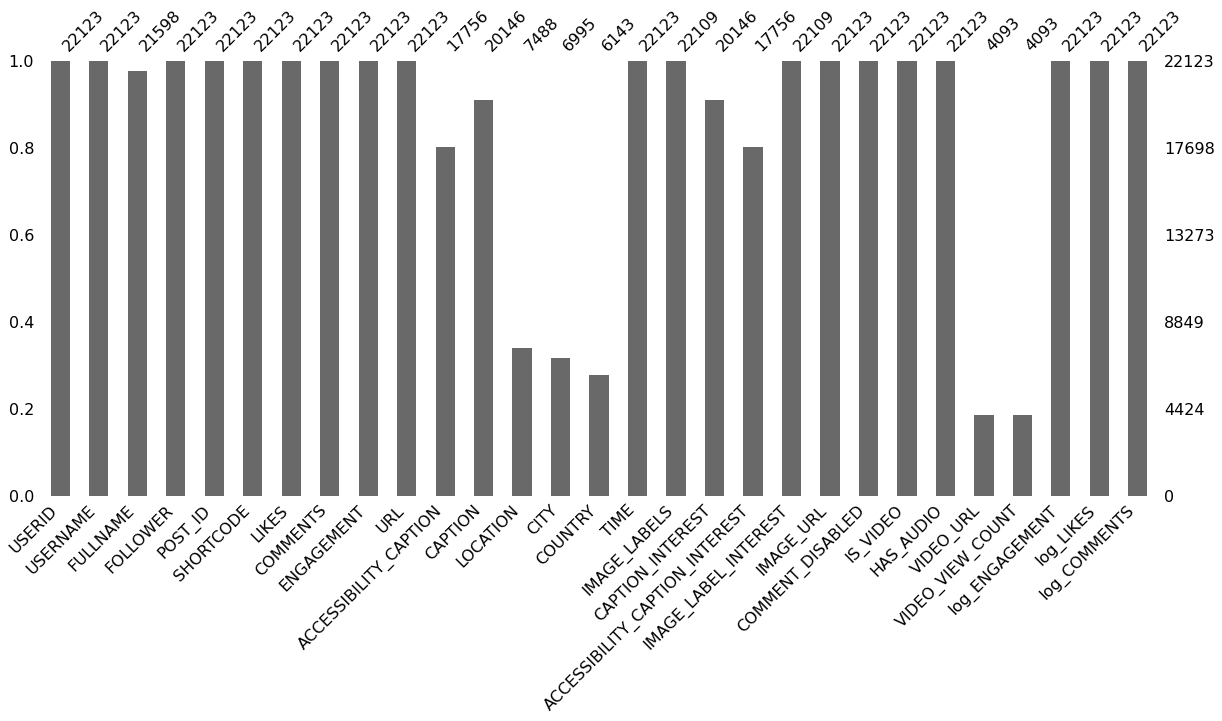

In [584]:
msno.bar(df, figsize=(20, 8))

Conert unix time to separate Date and Time columns

In [585]:
df['DATETIME'] = pd.to_datetime(df['TIME'],unit='s')

In [586]:
df['YEAR'] = pd.DatetimeIndex(df['DATETIME']).year
df['MONTH'] = pd.DatetimeIndex(df['DATETIME']).month
df['DAY'] = pd.DatetimeIndex(df['DATETIME']).day
df['DAYOFWEEK'] = pd.DatetimeIndex(df['DATETIME']).dayofweek
df['HOUR'] = pd.DatetimeIndex(df['DATETIME']).hour
df['MINUTE'] = pd.DatetimeIndex(df['DATETIME']).minute

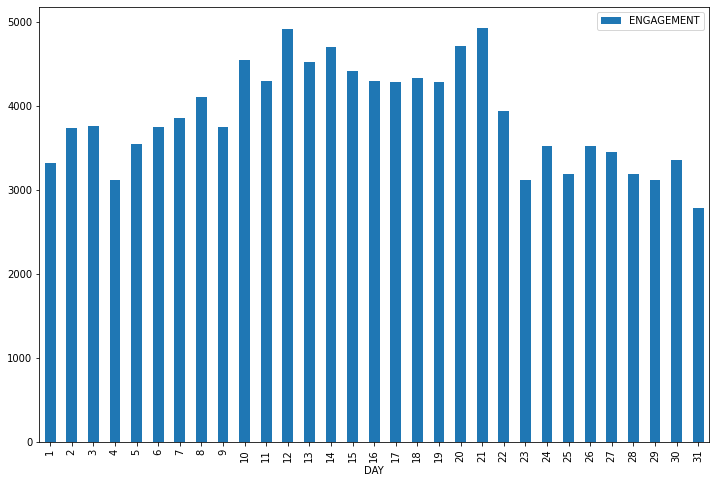

In [587]:
per_DAY = df.groupby(['DAY']).sum()
per_DAY.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

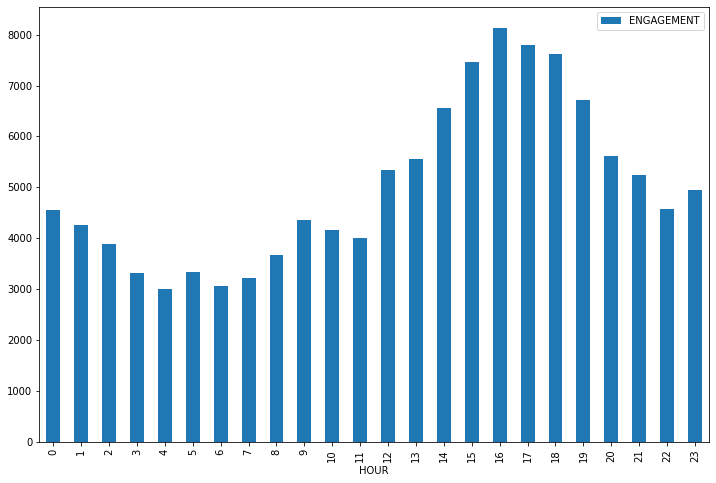

In [588]:
per_HOUR = df.groupby(['HOUR']).sum()
per_HOUR.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

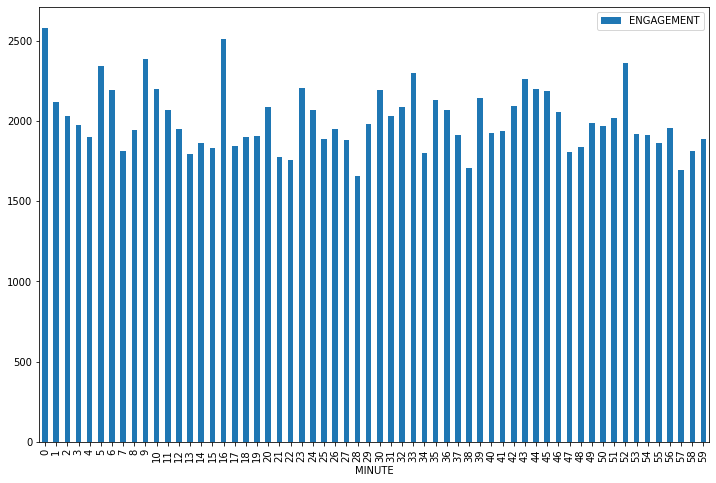

In [589]:
per_MINUTE = df.groupby(['MINUTE']).sum()
per_MINUTE.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

In [590]:
# per_FULLNAME = df.groupby(['USERNAME']).sum()
# per_FULLNAME.plot(y=["ENGAGEMENT", "LIKES","COMMENTS"], kind="bar",figsize=(12,8))

# plt.title("Total ENGAGEMENT, LIKES, COMMENTS per state",fontsize=15)
# plt.xlabel('FULLNAME',fontsize=12)
# plt.ylabel('ENGAGEMENT, LIKES, COMMENTS',fontsize=12)

Remove column that all values are unique:

In [591]:
for col in df.columns:
    if len(df[col].unique()) == len(df):
        print(col)
        #df.drop(col,inplace=True,axis=1)

IMAGE_URL


In [592]:
df.head()

,USERID,USERNAME,FULLNAME,FOLLOWER,POST_ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,IMAGE_URL,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_URL,VIDEO_VIEW_COUNT,log_ENGAGEMENT,log_LIKES,log_COMMENTS,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,36193140327,elastici_e_passamaneria,Elastici e Passamaneria,1052,2.530601e+18,CMegChUlwm2,23,0,2.19,https://www.instagram.com/p/CMegChUlwm2,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,NaN,NaN,NaN,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,https://instagram.fdok2-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/160374486_2823675294516254_158720847037227315_n.jpg?tp=1&_nc_ht=instagram.fdok2-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=fXOFeWEt3dcAX9moTcA&edm=ABfd0MgBAAAA&ccb=7-4&oh=cc36e9f840bc93314fcc9e76c9e4b8c6&oe=60DA4B27&_nc_sid=7bff83,no,no,no,NaN,NaN,1.160021,3.178054,0.000000,2021-03-16 10:39:23,2021,3,16,1,10,39
1920,36838177086,ilaria._004,????????????????,649,2.356209e+18,CCy784yAY26,138,2,21.57,https://www.instagram.com/p/CCy784yAY26,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,NaN,NaN,NaN,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,https://instagram.fgua5-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.86.1080.1080a/s640x640/111218478_173463267523124_4585802501296990831_n.jpg?tp=1&_nc_ht=instagram.fgua5-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=3eLtxoYSgkUAX-UqCUh&edm=ABfd0MgBAAAA&ccb=7-4&oh=8ca65c0f03f5315391059b88e4879625&oe=60DAB7D9&_nc_sid=7bff83,no,no,no,NaN,NaN,3.116622,4.934474,1.098612,2020-07-18 19:54:09,2020,7,18,5,19,54
1922,5633363536,amineblc,Mohamed Amine,1103,2.127312e+18,B2Fuq_ylPo_,46,4,4.53,https://www.instagram.com/p/B2Fuq_ylPo_,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, Accessories, Accessory, Face, Scarf, Portrait, Photography, Photo, Glasses, People, Selfie, Female, Coat, Smile",NaN,news,style_fashion,https://instagram.fjdf6-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c180.0.1079.1079a/s640x640/68822328_1329001810597157_525683053977317248_n.jpg?tp=1&_nc_ht=instagram.fjdf6-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=Oab_ik_P9acAX_VBh4i&edm=ABfd0MgBAAAA&ccb=7-4&oh=310007350b72a7c0ca933d072e7fe557&oe=60DAC5ED&_nc_sid=7bff83,no,no,no,NaN,NaN,1.710188,3.850148,1.609438,2019-09-07 00:15:33,2019,9,7,5,0,15
1929,555815104,vittoria_caron,V i t t o r i a C a r o n,1076,2.448009e+18,CH5E6XPDO_y,50,2,4.83,https://www.instagram.com/p/CH5E6XPDO_y,"Photo by V i t t o r i a C a r o n in Palermo, Italy with @federico_alberti_. May be an image of 2 people, outerwear and monument.","Throwback a quando eravamo felici e abbronzati. Ma soprattutto, fuori di casa. #lockdown #tb","Palermo, Italy","Palermo, Province of Palermo, Italy",Italy,1606045492,"Person, Human, Clothing, Apparel, Sitting, Shorts, Architecture, Building, Female, Couch, Furniture, Shoe, Footwear, Pillar, Column, Flagstone, Woman",entertainment,music,style_fashion,https://instagram.fmad10-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/125948565_1705795609581805_7496045465512730599_n.jpg?tp=1&_nc_ht=instagram.fmad10-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=Ch4eZDGY24oAX-YFqQL&edm=ABfd0MgBAAAA&ccb=7-4&oh=5aad3be023aaf33d776f03322fcefe17&oe=60D9F693&_nc_sid=7bff83,no,no,no,NaN,NaN,1.763017,3.931826,1.098612,2020-11-22 11:44:52,2020,11,22,6,11,44
1930,2727935277,mr_artworker_,Shivam Rathore⊂(◉‿◉)つ,1319,2.580835e+18,CPQ93T1FJfN,102,8,8.34,https://www.instagram.com/p/CP

In [593]:
df.URL.head()
# SHORTCODE
# URL
# IMAGE_URL
# VIDEO_URL # Not working

1
1918    https://www.instagram.com/p/CMegChUlwm2
1920    https://www.instagram.com/p/CCy784yAY26
1922    https://www.instagram.com/p/B2Fuq_ylPo_
1929    https://www.instagram.com/p/CH5E6XPDO_y
1930    https://www.instagram.com/p/CPQ93T1FJfN
Name: URL, dtype: object

## Remove unneccessary columns from Dataframe

In [594]:
df.drop(['POST_ID','VIDEO_URL','SHORTCODE','IMAGE_URL','USERID','FULLNAME','USERNAME'],inplace=True,axis=1)

After talking with Royi on 1-Oct: 

In [595]:
df.drop(['URL'],inplace=True,axis=1)

In [596]:
#df.drop(['VIDEO_VIEW_COUNT'],inplace=True,axis=1)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22123 entries, 1918 to 37546
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   FOLLOWER                        22123 non-null  int64         
 1   LIKES                           22123 non-null  int64         
 2   COMMENTS                        22123 non-null  int64         
 3   ENGAGEMENT                      22123 non-null  float64       
 4   ACCESSIBILITY_CAPTION           17756 non-null  object        
 5   CAPTION                         20146 non-null  object        
 6   LOCATION                        7488 non-null   object        
 7   CITY                            6995 non-null   object        
 8   COUNTRY                         6143 non-null   object        
 9   TIME                            22123 non-null  int64         
 10  IMAGE_LABELS                    22109 non-null  object        
 11 

Convert columns type to characters :

In [598]:
df['COMMENT_DISABLED'].value_counts()

no     21990
yes      133
Name: COMMENT_DISABLED, dtype: int64

In [599]:
df['COMMENT_DISABLED'] = df['COMMENT_DISABLED'].map(dict(yes=1, no=0))

In [600]:
df['IS_VIDEO'] = df['IS_VIDEO'].map(dict(yes=1, no=0))

In [601]:
df['HAS_AUDIO'] = df['HAS_AUDIO'].map(dict(yes=1, no=0))

In [602]:
df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].value_counts()

COMMENT_DISABLED  IS_VIDEO  HAS_AUDIO
0                 0         0            17929
                  1         1             3787
                            0              274
1                 0         0              101
                  1         1               26
                            0                6
dtype: int64

In [603]:
pd.unique(df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].values.ravel('K'))

array([0, 1])

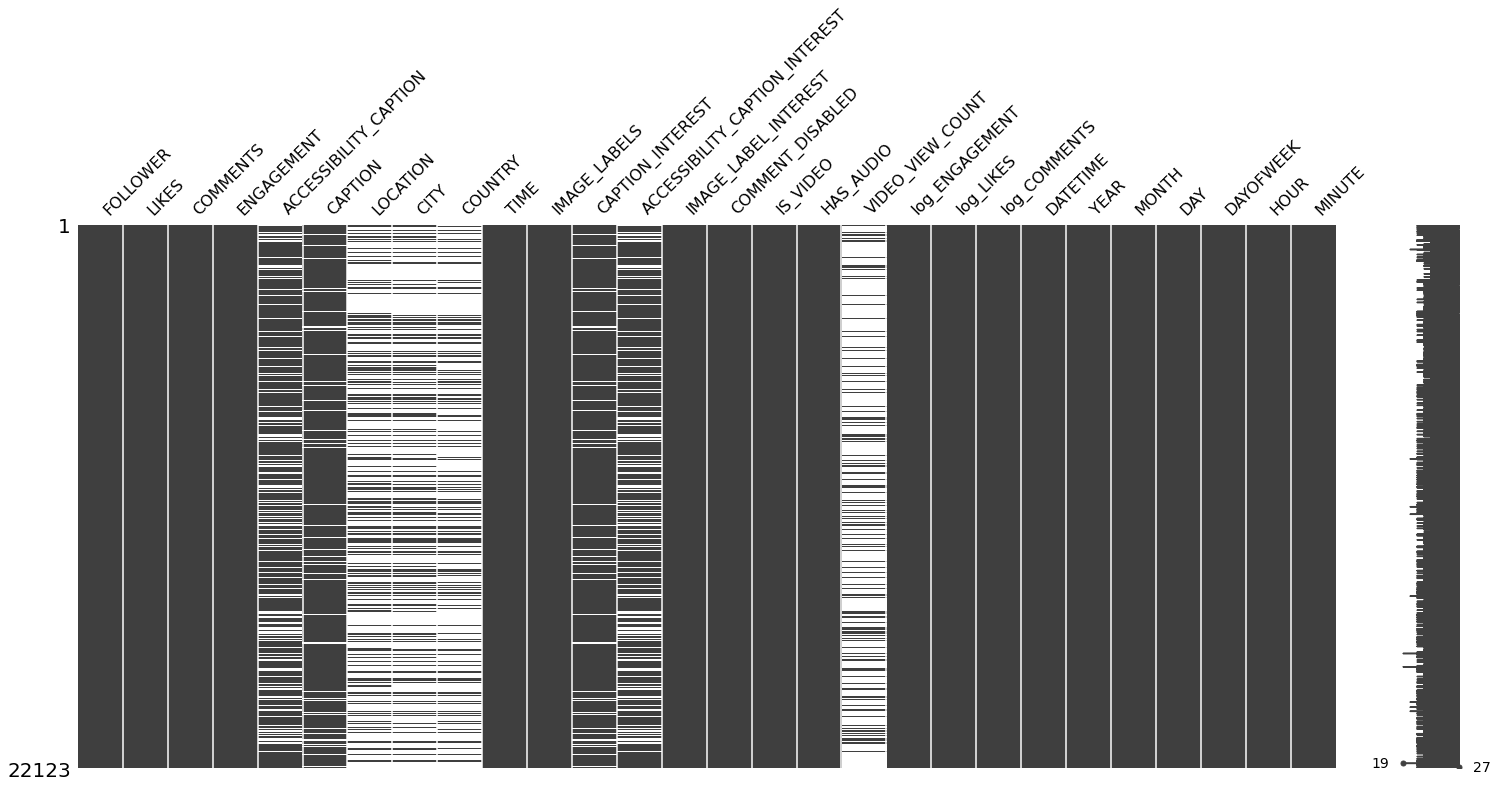

In [604]:
msno.matrix(df)

In [605]:
df.columns

Index(['FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'ACCESSIBILITY_CAPTION',
       'CAPTION', 'LOCATION', 'CITY', 'COUNTRY', 'TIME', 'IMAGE_LABELS',
       'CAPTION_INTEREST', 'ACCESSIBILITY_CAPTION_INTEREST',
       'IMAGE_LABEL_INTEREST', 'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO',
       'VIDEO_VIEW_COUNT', 'log_ENGAGEMENT', 'log_LIKES', 'log_COMMENTS',
       'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE'],
      dtype='object')

Raname the index

In [606]:
df = df.rename_axis('LINE_NUM_INDEX')

Note by Eladk: we can fill location values by using a merdiction model base in the influancer and the time for the post. <BR> 
For Now, I'll just fill the columns with NULL

Replace all cases where VIDEO_VIEW_COUNT == Nan with 0. <BR> for double check i verified it with is_video column

In [607]:
df['VIDEO_VIEW_COUNT'].fillna(0, inplace=True)

Eladk note 8-Sep-2021: I still need to handle missing values in column:


*   FULLNAME
*   ACCESSIBILITY_CAPTION - specify full name, time, location, video or picture and tag
*   CAPTION - the text on this post (by the post uploader
*   LOCATION, CITY, COUNTRY - location
*   CAPTION_INTEREST -
*   ACCESSIBILITY_CAPTION_INTEREST


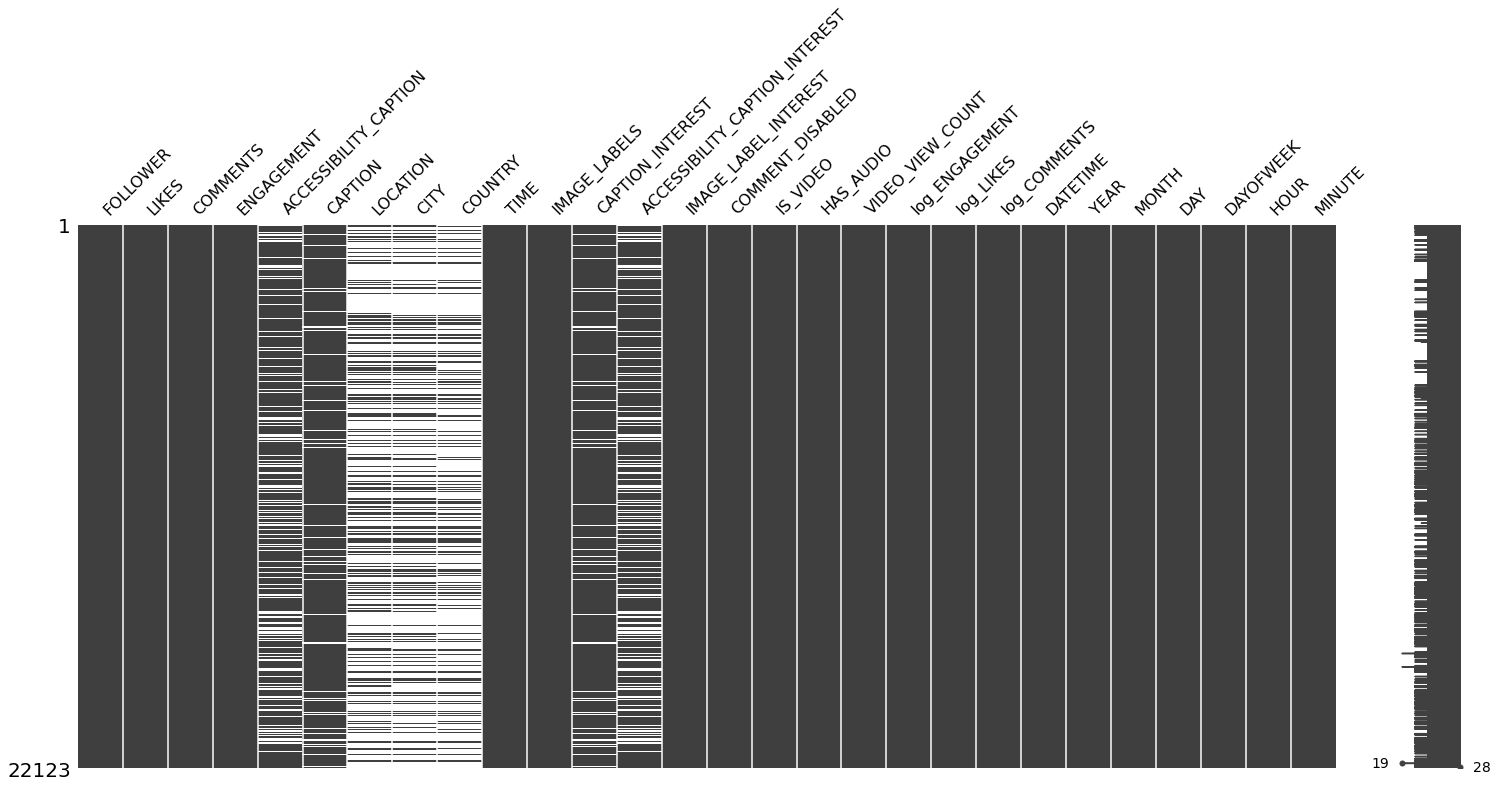

In [608]:
msno.matrix(df)

In [609]:
df.CAPTION.value_counts().sort_values(ascending=False)

????                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    179
????????                                                                                                                                                                                                                                                                                                                                                                                                    

selecting a subset of the data:

In [610]:
df[['ACCESSIBILITY_CAPTION','CAPTION','LOCATION', 'CITY', 'COUNTRY'\
    ,'CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(5)

,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,,,,,,
1918,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,NaN,NaN,NaN,education,movies
1920,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,NaN,NaN,NaN,education,arts_entertainment
1922,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,NaN,news
1929,"Photo by V i t t o r i a C a r o n in Palermo, Italy with @federico_alberti_. May be an image of 2 people, outerwear and monument.","Throwback a quando eravamo felici e abbronzati. Ma soprattutto, fuori di casa. #lockdown #tb","Palermo, Italy","Palermo, Province of Palermo, Italy",Italy,entertainment,music
1930,NaN,????,NaN,NaN,NaN,education,NaN


Increase the length to a column so that we'll see all the text in a cell

In [611]:
pd.options.display.max_colwidth = 1000
df.ACCESSIBILITY_CAPTION.head(5)

LINE_NUM_INDEX
1918                                                                                     Photo by Elastici e Passamaneria on March 16, 2021.
1920                                                                Photo by ???????????????? on July 18, 2020. May be an image of 1 person.
1922                                                                                                     Photo by Mohamed Amine in Mawazine.
1929    Photo by V i t t o r i a   C a r o n in Palermo, Italy with @federico_alberti_. May be an image of 2 people, outerwear and monument.
1930                                                                                                                                     NaN
Name: ACCESSIBILITY_CAPTION, dtype: object

Selecting 1 row by index (specific column only)

In [612]:
#df[df.index == 1929][['URL','ACCESSIBILITY_CAPTION','DATETIME','LOCATION']] # name, 
df[df.index == 1929][['ACCESSIBILITY_CAPTION','DATETIME','LOCATION']] # name, 

,ACCESSIBILITY_CAPTION,DATETIME,LOCATION
LINE_NUM_INDEX,,,
1929,"Photo by V i t t o r i a C a r o n in Palermo, Italy with @federico_alberti_. May be an image of 2 people, outerwear and monument.",2020-11-22 11:44:52,"Palermo, Italy"


In [613]:
df.columns

Index(['FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'ACCESSIBILITY_CAPTION',
       'CAPTION', 'LOCATION', 'CITY', 'COUNTRY', 'TIME', 'IMAGE_LABELS',
       'CAPTION_INTEREST', 'ACCESSIBILITY_CAPTION_INTEREST',
       'IMAGE_LABEL_INTEREST', 'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO',
       'VIDEO_VIEW_COUNT', 'log_ENGAGEMENT', 'log_LIKES', 'log_COMMENTS',
       'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE'],
      dtype='object')

In [614]:
df[['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(20)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,
1918,education,movies
1920,education,arts_entertainment
1922,NaN,news
1929,entertainment,music
1930,education,NaN
1932,desserts_baking,travel
1934,desserts_baking,NaN
1935,dating_and_relationships,NaN
1936,arts_entertainment,movies


In [615]:
#df[df.index == 1932][['URL','CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']] # name, 
df[df.index == 1932][['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']] # name,

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,
1932,desserts_baking,travel


there are 308 combination as CAPTION_INTEREST and ACCESSIBILITY_CAPTION_INTEREST

In [616]:
df.groupby(['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,counts
0,arts_entertainment,arts_entertainment,1228
1,parenting,arts_entertainment,1012
2,education,arts_entertainment,785
3,arts_entertainment,travel,573
4,parenting,travel,531
5,style_fashion,arts_entertainment,483
6,arts_entertainment,style_fashion,421
7,dating_and_relationships,arts_entertainment,396
8,style_fashion,style_fashion,379
9,music,arts_entertainment,354


there are 35 unique CAPTION_INTEREST


In [617]:
df.groupby(['CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,counts
0,arts_entertainment,3856
1,parenting,3120
2,education,1917
3,style_fashion,1599
4,dating_and_relationships,1233
5,food_drink,1220
6,music,1208
7,travel,1073
8,humor,800
9,pets,676


there are 26 unique ACCESSIBILITY_CAPTION_INTEREST


In [618]:
df.groupby(['ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(30)

,ACCESSIBILITY_CAPTION_INTEREST,counts
0,arts_entertainment,7427
1,travel,3111
2,style_fashion,1922
3,food_drink,1088
4,parenting,765
5,events,714
6,music,649
7,movies,417
8,pets,343
9,books_literature,145


Eladk 1-Oct , creat new column the state if CAPTION_INTEREST == ACCESSIBILITY_CAPTION_INTEREST

In [619]:
df.groupby(['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,counts
0,arts_entertainment,arts_entertainment,1228
1,parenting,arts_entertainment,1012
2,education,arts_entertainment,785
3,arts_entertainment,travel,573
4,parenting,travel,531
5,style_fashion,arts_entertainment,483
6,arts_entertainment,style_fashion,421
7,dating_and_relationships,arts_entertainment,396
8,style_fashion,style_fashion,379
9,music,arts_entertainment,354


For Now (Eladk 2021-Sep-11) I'll fill every NaN with Null

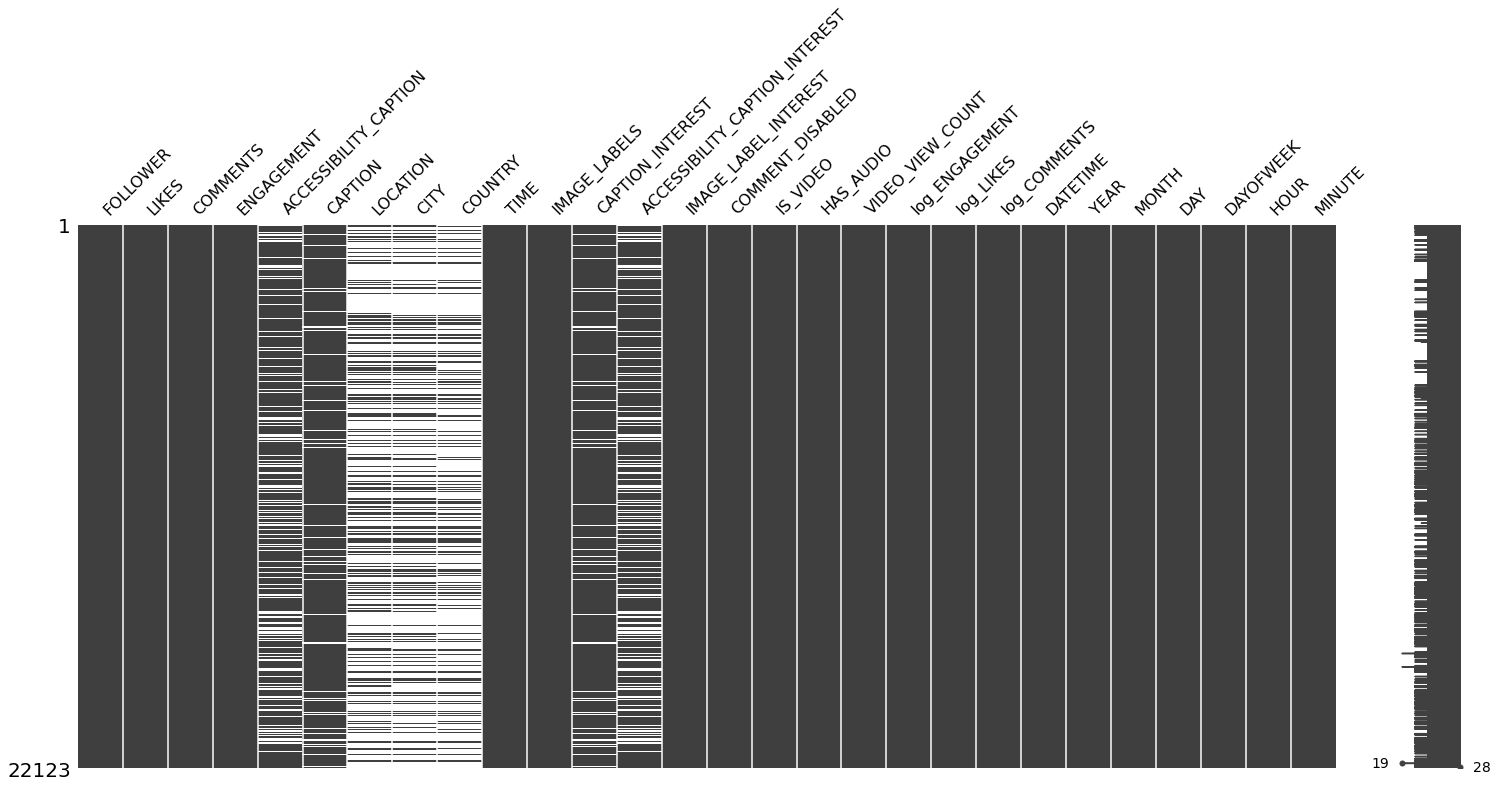

In [620]:
msno.matrix(df)

In [621]:
#https://datatofish.com/rows-with-nan-pandas-dataframe/
#len(df[df['FULLNAME'].isna()]) # 126 #849
#df[df['FULLNAME'].isnull()]
#df[df.isna().any(axis=1)] # len = 4020
# df[df.isnull().any(axis=1)]

In [622]:
for col in df.columns:
    if len(df[df[col].isnull()]) > 0:
      df[col] = df[col].fillna('Null')
      print(col)

ACCESSIBILITY_CAPTION
CAPTION
LOCATION
CITY
COUNTRY
IMAGE_LABELS
CAPTION_INTEREST
ACCESSIBILITY_CAPTION_INTEREST
IMAGE_LABEL_INTEREST


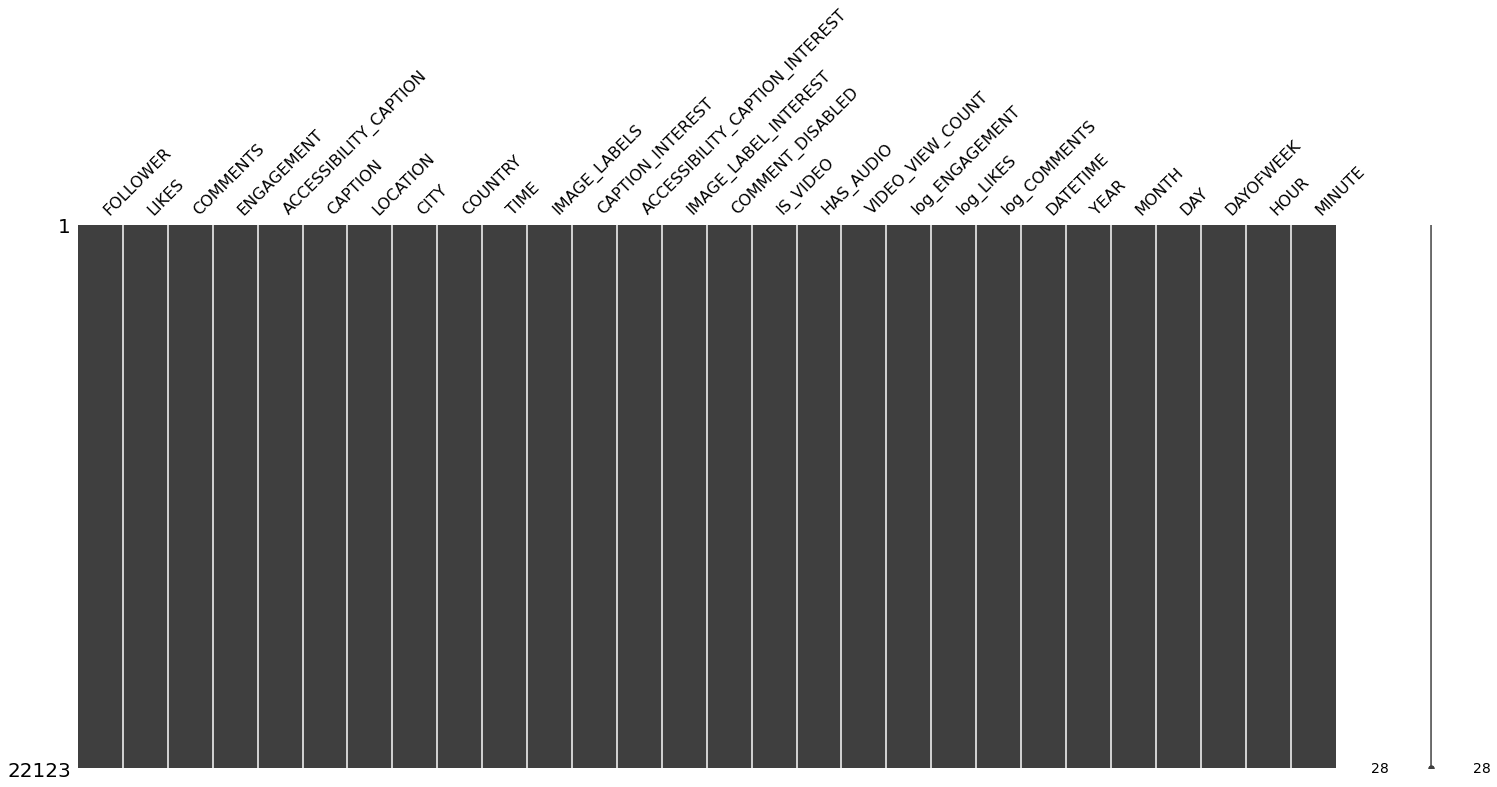

In [623]:
msno.matrix(df)

In [624]:
df.IMAGE_LABEL_INTEREST.unique()

array(['business', 'style_fashion', 'movies', 'hobbies_interests',
       'travel', 'arts_entertainment', 'food_drink', 'parenting',
       'sports', 'books_literature', 'music', 'home_garden', 'events',
       'weddings', 'legal', 'health', 'education', 'technology_computing',
       'cars_motorcycles', 'accessories', 'news', 'politics', 'gaming',
       'entertainment', 'pets', 'fitness', 'dating_and_relationships',
       'podcasts', 'baking_cooking', 'Null', 'green_living', 'finance',
       'chef', 'desserts_baking', 'comic_books', 'humor'], dtype=object)

In [625]:
df.IMAGE_LABEL_INTEREST.value_counts()

style_fashion               8970
arts_entertainment          2654
travel                      2631
food_drink                  1661
business                    1337
sports                       596
home_garden                  560
technology_computing         436
music                        429
events                       360
pets                         339
entertainment                318
movies                       306
parenting                    297
fitness                      176
books_literature             169
weddings                     135
health                       112
news                          91
education                     79
hobbies_interests             76
politics                      66
legal                         62
dating_and_relationships      54
gaming                        44
podcasts                      43
cars_motorcycles              33
baking_cooking                32
Null                          14
comic_books                   11
green_livi

In [626]:
IMAGE_LABEL_INTEREST = df.groupby(['IMAGE_LABEL_INTEREST']).head(10)
print(IMAGE_LABEL_INTEREST)

                FOLLOWER  LIKES  COMMENTS  ...  DAYOFWEEK HOUR MINUTE
LINE_NUM_INDEX                             ...                       
1918                1052     23         0  ...          1   10     39
1920                 649    138         2  ...          5   19     54
1922                1103     46         4  ...          5    0     15
1929                1076     50         2  ...          6   11     44
1930                1319    102         8  ...          0   18      5
...                  ...    ...       ...  ...        ...  ...    ...
28557                718      2         0  ...          3    1     42
32807                617      1         0  ...          2   12     56
28867                718      1         0  ...          3    1     42
30671               5258      7         0  ...          4    8      3
29158             193600    176         2  ...          2    9      8

[332 rows x 28 columns]


## Create bins (buckets) of Likes, Comment Engagement so we can use a classification model

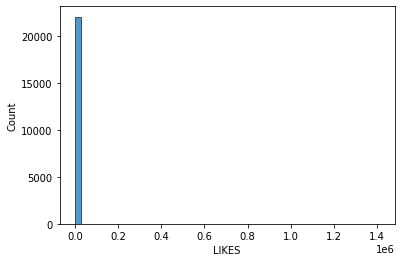

In [627]:
sns.histplot(x = df.LIKES,bins=50)

In [628]:
bins_LIKES=[min(df.LIKES)-1,15,40,200,400,max(df.LIKES)+1]
pd.cut(x=df.LIKES, bins=5).value_counts()
pd.cut(x=df.LIKES, bins=bins_LIKES, labels=bin_labels,
       ordered=True).value_counts()

High         9720
Medium       5043
Low          3628
Extreme      1964
Very High    1768
Name: LIKES, dtype: int64

In [629]:
df['LIKES_RANK'] = pd.cut(x=df.LIKES, bins=bins_LIKES, labels=bin_labels,
       ordered=True)

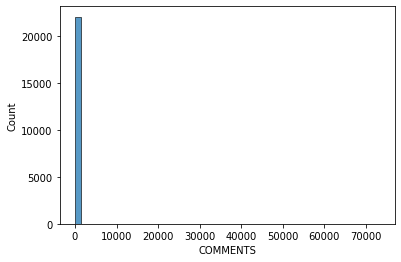

In [630]:
sns.histplot(x = df.COMMENTS,bins=50)

In [631]:
len(df.COMMENTS) #3921

22123

In [632]:
bins_COMMENTS=[min(df.COMMENTS)-1,1,5,40,60,max(df.COMMENTS)]
#pd.cut(x=df.COMMENTS, bins=5).value_counts()
pd.cut(x=df.COMMENTS, bins=bins_COMMENTS#, labels=labels 
        ,ordered=True).value_counts()

(-1, 1]        8394
(5, 40]        6627
(1, 5]         5700
(60, 73188]     818
(40, 60]        584
Name: COMMENTS, dtype: int64

In [633]:
df['COMMENTS_RANK'] = pd.cut(x=df.COMMENTS, bins=bins_COMMENTS, labels=bin_labels 
        ,ordered=True)

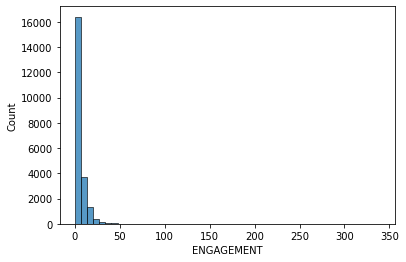

In [634]:
sns.histplot(x = df.ENGAGEMENT,bins=50)

In [635]:
bins_ENGAGEMENT=[min(df.ENGAGEMENT)-1,1.5,3.5,10,15,max(df.ENGAGEMENT)]
pd.cut(x=df.ENGAGEMENT, bins=5, labels=bin_labels, ordered=True).value_counts()
pd.cut(x=df.ENGAGEMENT, bins=bins_ENGAGEMENT, labels=bin_labels, ordered=True).value_counts()

High         6857
Low          6365
Medium       5495
Very High    1767
Extreme      1639
Name: ENGAGEMENT, dtype: int64

In [636]:
df['ENGAGEMENT_RANK'] = pd.cut(x=df.ENGAGEMENT, bins=bins_ENGAGEMENT, labels=bin_labels, ordered=True)

In [637]:
df['ENGAGEMENT_RANK']

LINE_NUM_INDEX
1918      Medium
1920     Extreme
1922        High
1929        High
1930        High
          ...   
35893        Low
35916        Low
36397        Low
36489        Low
37546        Low
Name: ENGAGEMENT_RANK, Length: 22123, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

Convert Rank to Code using Dictionary 

In [638]:
df.columns

Index(['FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'ACCESSIBILITY_CAPTION',
       'CAPTION', 'LOCATION', 'CITY', 'COUNTRY', 'TIME', 'IMAGE_LABELS',
       'CAPTION_INTEREST', 'ACCESSIBILITY_CAPTION_INTEREST',
       'IMAGE_LABEL_INTEREST', 'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO',
       'VIDEO_VIEW_COUNT', 'log_ENGAGEMENT', 'log_LIKES', 'log_COMMENTS',
       'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE',
       'LIKES_RANK', 'COMMENTS_RANK', 'ENGAGEMENT_RANK'],
      dtype='object')

In [639]:
df.LIKES_RANK.unique()

['Medium', 'High', 'Low', 'Very High', 'Extreme']
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

In [640]:
df['COMMENTS_RANK']

LINE_NUM_INDEX
1918        Low
1920     Medium
1922     Medium
1929     Medium
1930       High
          ...  
35893       Low
35916       Low
36397       Low
36489       Low
37546       Low
Name: COMMENTS_RANK, Length: 22123, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

In [641]:
map_dict_rank = {'Low':0.0 , 'Medium':1.0, 'High':2.0, 'Very High':3.0, 'Extreme':4.0}
map_dict_rank

{'Extreme': 4.0, 'High': 2.0, 'Low': 0.0, 'Medium': 1.0, 'Very High': 3.0}

In [642]:
df['LIKES_RANK_INT'] =  df['LIKES_RANK'].map(map_dict_rank).astype(int)

In [643]:
df['COMMENTS_RANK_INT'] =   df['COMMENTS_RANK'].map(map_dict_rank).astype(int)

In [644]:
df['ENGAGEMENT_RANK_INT'] =   df['ENGAGEMENT_RANK'].map(map_dict_rank).astype(int)

In [645]:
df[['LIKES_RANK','LIKES_RANK_INT']].value_counts().sort_index()

LIKES_RANK  LIKES_RANK_INT
Low         0                 3628
Medium      1                 5043
High        2                 9720
Very High   3                 1768
Extreme     4                 1964
dtype: int64

In [646]:
df[['COMMENTS_RANK','COMMENTS_RANK_INT']].value_counts().sort_index()

COMMENTS_RANK  COMMENTS_RANK_INT
Low            0                    8394
Medium         1                    5700
High           2                    6627
Very High      3                     584
Extreme        4                     818
dtype: int64

In [647]:
df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_INT']].value_counts().sort_index()

ENGAGEMENT_RANK  ENGAGEMENT_RANK_INT
Low              0                      6365
Medium           1                      5495
High             2                      6857
Very High        3                      1767
Extreme          4                      1639
dtype: int64

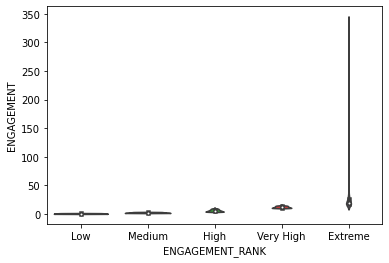

In [648]:
p = sns.violinplot(x='ENGAGEMENT_RANK', y='ENGAGEMENT', 
                    #order=cut_order, 
                    data=df)

## Eladk 28-Sep-2021, more bucketing



1.  VIDEO_VIEW_COUNT          41.148879
2.  FOLLOWER                  35.852012
3.  USERNAME_OBJECT_AS_INT    17.961764
4.  CAPTION_OBJECT_AS_INT      3.558228
5.  HOUR                       1.201713
6.  MINUTE                     0.277403



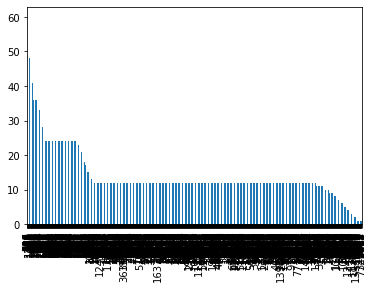

In [649]:
df.FOLLOWER.value_counts().sort_values(ascending=False).plot.bar()
#.reindex()

## Replacing Charecters  with Number uning OrdinalEncoder

In [650]:
# list of char / object columns

In [651]:
df.dtypes

FOLLOWER                                   int64
LIKES                                      int64
COMMENTS                                   int64
ENGAGEMENT                               float64
ACCESSIBILITY_CAPTION                     object
CAPTION                                   object
LOCATION                                  object
CITY                                      object
COUNTRY                                   object
TIME                                       int64
IMAGE_LABELS                              object
CAPTION_INTEREST                          object
ACCESSIBILITY_CAPTION_INTEREST            object
IMAGE_LABEL_INTEREST                      object
COMMENT_DISABLED                           int64
IS_VIDEO                                   int64
HAS_AUDIO                                  int64
VIDEO_VIEW_COUNT                         float64
log_ENGAGEMENT                           float64
log_LIKES                                float64
log_COMMENTS        

In [652]:
df.select_dtypes(include=['object']).dtypes

ACCESSIBILITY_CAPTION             object
CAPTION                           object
LOCATION                          object
CITY                              object
COUNTRY                           object
IMAGE_LABELS                      object
CAPTION_INTEREST                  object
ACCESSIBILITY_CAPTION_INTEREST    object
IMAGE_LABEL_INTEREST              object
dtype: object

In [653]:
df.select_dtypes(include=['object']).dtypes.index

Index(['ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'IMAGE_LABELS', 'CAPTION_INTEREST', 'ACCESSIBILITY_CAPTION_INTEREST',
       'IMAGE_LABEL_INTEREST'],
      dtype='object')

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22123 entries, 1918 to 37546
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   FOLLOWER                        22123 non-null  int64         
 1   LIKES                           22123 non-null  int64         
 2   COMMENTS                        22123 non-null  int64         
 3   ENGAGEMENT                      22123 non-null  float64       
 4   ACCESSIBILITY_CAPTION           22123 non-null  object        
 5   CAPTION                         22123 non-null  object        
 6   LOCATION                        22123 non-null  object        
 7   CITY                            22123 non-null  object        
 8   COUNTRY                         22123 non-null  object        
 9   TIME                            22123 non-null  int64         
 10  IMAGE_LABELS                    22123 non-null  object        
 11 

In [655]:
enc = OrdinalEncoder()

Many columns:

In [656]:
for col in df.select_dtypes(include=['object']).dtypes.index:
#for col in ['USERNAME','FULLNAME']:
  #col_list = pd.DataFrame(df[col].unique())
  #col_list.rename(columns = {0:col},inplace=True)
  #col_list.rename(columns = {0:col},inplace=True)
  enc.fit(df[[col]])
  df[col + '_OBJECT_AS_INT'] = enc.transform(df[[col]])
  #print(col)

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22123 entries, 1918 to 37546
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   FOLLOWER                                      22123 non-null  int64         
 1   LIKES                                         22123 non-null  int64         
 2   COMMENTS                                      22123 non-null  int64         
 3   ENGAGEMENT                                    22123 non-null  float64       
 4   ACCESSIBILITY_CAPTION                         22123 non-null  object        
 5   CAPTION                                       22123 non-null  object        
 6   LOCATION                                      22123 non-null  object        
 7   CITY                                          22123 non-null  object        
 8   COUNTRY                                       22123 non-null  o

In [658]:
df.head(2)

,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,log_LIKES,log_COMMENTS,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,1052,23,0,2.19,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,Null,Null,Null,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,0,0,0,0.0,1.160021,3.178054,0.000000,2021-03-16 10:39:23,2021,3,16,1,10,39,Medium,Low,Medium,1,0,1,4132.0,6111.0,2093.0,1265.0,68.0,5074.0,12.0,19.0,5.0
1920,649,138,2,21.57,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,Null,Null,Null,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,0,0,0,0.0,3.116622,4.934474,1.098612,2020-07-18 19:54:09,2020,7,18,5,19,54,High,Medium,Extreme,2,1,4,377.0,17407.0,2093.0,1265.0,68.0,3402.0,12.0,2.0,32.0


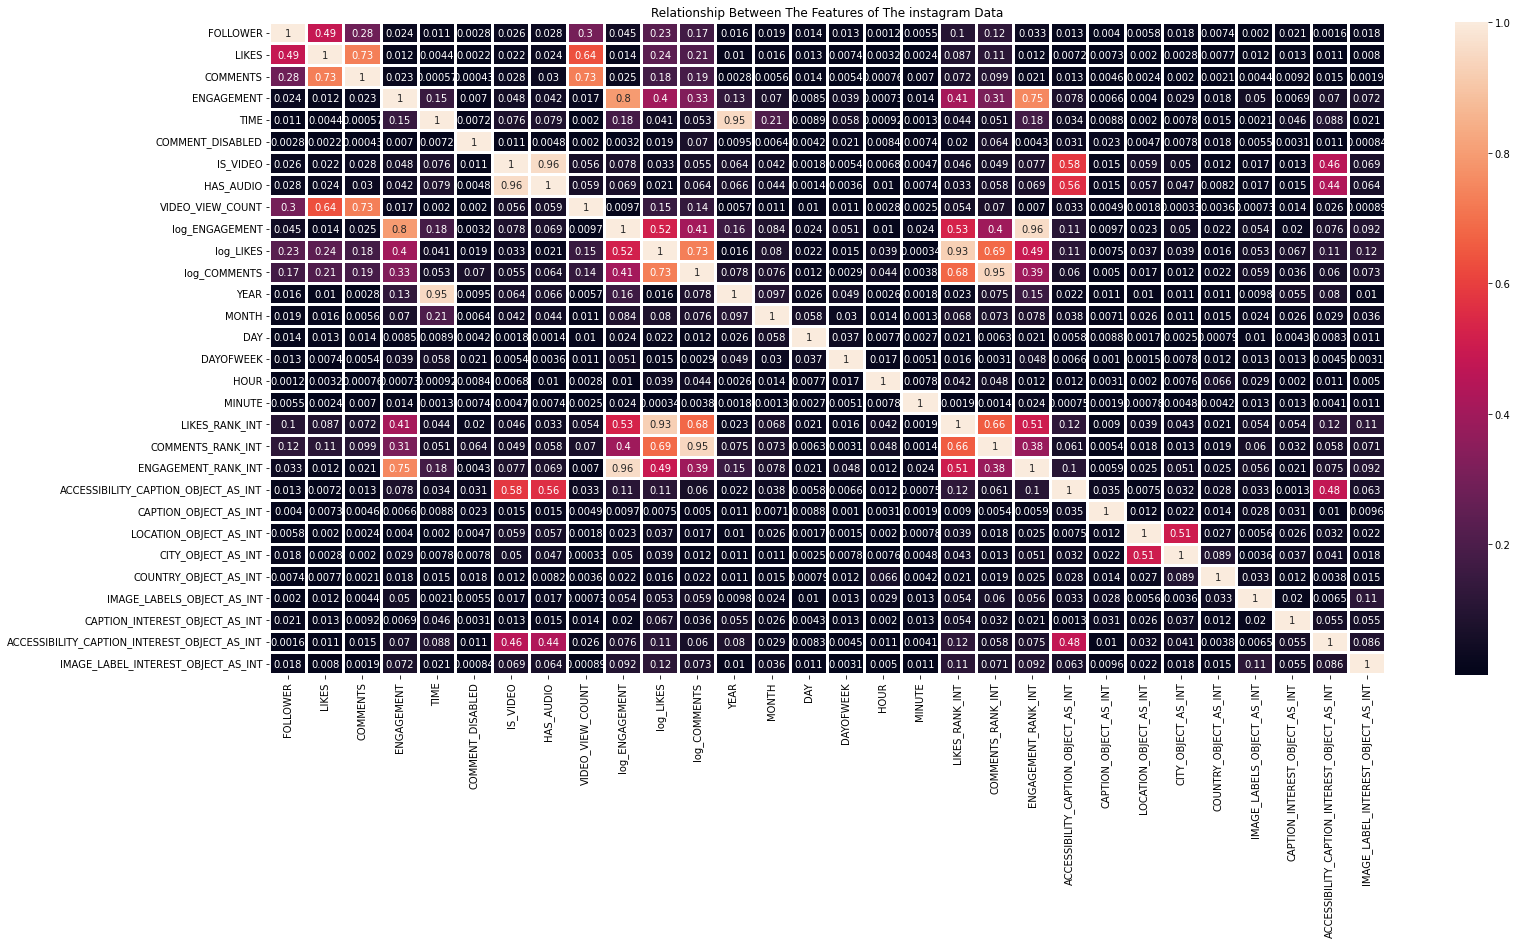

In [659]:
plt.figure(figsize=(25,12))
plt.title("Relationship Between The Features of The instagram Data")
sns.heatmap(df.corr().abs(), annot=True, linewidths = 2, linecolor = "white")

In [660]:
# %%time 
# df = df.select_dtypes(include=np.number)
# sns.pairplot(df ,height=1.8) # takes about 5 min.

## More EDA

In [661]:
df.head(2)

,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,log_LIKES,log_COMMENTS,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,1052,23,0,2.19,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,Null,Null,Null,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,0,0,0,0.0,1.160021,3.178054,0.000000,2021-03-16 10:39:23,2021,3,16,1,10,39,Medium,Low,Medium,1,0,1,4132.0,6111.0,2093.0,1265.0,68.0,5074.0,12.0,19.0,5.0
1920,649,138,2,21.57,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,Null,Null,Null,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,0,0,0,0.0,3.116622,4.934474,1.098612,2020-07-18 19:54:09,2020,7,18,5,19,54,High,Medium,Extreme,2,1,4,377.0,17407.0,2093.0,1265.0,68.0,3402.0,12.0,2.0,32.0


## Feature Engneering

## Image captioning

Eladk 2021-Sep-17, we need to:


*   convert y colum to 5 classes so we can have a classification problem and not a regresion model
*   check if the data is inbalance (so we need to use stratify)



# Split the Data

select only int and float column types to X 
seletc LIKES, COMMENTS, ENGAGEMENT as y

In [662]:
df.columns

Index(['FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'ACCESSIBILITY_CAPTION',
       'CAPTION', 'LOCATION', 'CITY', 'COUNTRY', 'TIME', 'IMAGE_LABELS',
       'CAPTION_INTEREST', 'ACCESSIBILITY_CAPTION_INTEREST',
       'IMAGE_LABEL_INTEREST', 'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO',
       'VIDEO_VIEW_COUNT', 'log_ENGAGEMENT', 'log_LIKES', 'log_COMMENTS',
       'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'HOUR', 'MINUTE',
       'LIKES_RANK', 'COMMENTS_RANK', 'ENGAGEMENT_RANK', 'LIKES_RANK_INT',
       'COMMENTS_RANK_INT', 'ENGAGEMENT_RANK_INT',
       'ACCESSIBILITY_CAPTION_OBJECT_AS_INT', 'CAPTION_OBJECT_AS_INT',
       'LOCATION_OBJECT_AS_INT', 'CITY_OBJECT_AS_INT', 'COUNTRY_OBJECT_AS_INT',
       'IMAGE_LABELS_OBJECT_AS_INT', 'CAPTION_INTEREST_OBJECT_AS_INT',
       'ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT',
       'IMAGE_LABEL_INTEREST_OBJECT_AS_INT'],
      dtype='object')

In [663]:
X = df.select_dtypes(include=['number'])
X.drop(['LIKES','COMMENTS','ENGAGEMENT','log_ENGAGEMENT'], axis=1, inplace=True) #['LIKES','COMMENTS','ENGAGEMENT']

In [664]:
X.drop(['LIKES_RANK_INT','COMMENTS_RANK_INT','ENGAGEMENT_RANK_INT'], axis=1, inplace=True) #['LIKES','COMMENTS','ENGAGEMENT']

In [665]:
y = df['ENGAGEMENT']
y1 = df['LIKES']
y2 = df['COMMENTS']
y3 = df['log_ENGAGEMENT']
y_ENGAGEMENT_RANK_INT = df['ENGAGEMENT_RANK_INT']
y_LIKES_RANK_INT = df['LIKES_RANK_INT']
y_COMMENTS_RANK_INT = df['COMMENTS_RANK_INT']

In [666]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [667]:
print('Training Features Shape:', X_train.shape)
print('Training Labels (y) Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels(y) Shape:', y_test.shape)

Training Features Shape: (16592, 23)
Training Labels (y) Shape: (16592,)
Testing Features Shape: (5531, 23)
Testing Labels(y) Shape: (5531,)


# Mechine Learning  Model

## Appling First1 Model - KNN model

In [668]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = (mse(y_test,pred))**0.5 #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.0054997759243756
RMSE value for k=  2 is: 0.887600635745348
RMSE value for k=  3 is: 0.8476451044945493
RMSE value for k=  4 is: 0.8287000380321305
RMSE value for k=  5 is: 0.8183647303298955
RMSE value for k=  6 is: 0.811370613335745
RMSE value for k=  7 is: 0.8094757854049008
RMSE value for k=  8 is: 0.8055300245844077
RMSE value for k=  9 is: 0.8016609199861155
RMSE value for k=  10 is: 0.7995920723116953
RMSE value for k=  11 is: 0.7967635002658775
RMSE value for k=  12 is: 0.7957924460680981
RMSE value for k=  13 is: 0.7947302805826961
RMSE value for k=  14 is: 0.7945972704188965
RMSE value for k=  15 is: 0.7951835790702402
RMSE value for k=  16 is: 0.7954399520738734
RMSE value for k=  17 is: 0.7953455853179681
RMSE value for k=  18 is: 0.7945379938434407
RMSE value for k=  19 is: 0.7950732575770417
RMSE value for k=  20 is: 0.7950252718348629
RMSE value for k=  21 is: 0.7949933072339679
RMSE value for k=  22 is: 0.7949415754111772
RMSE value for k=  23

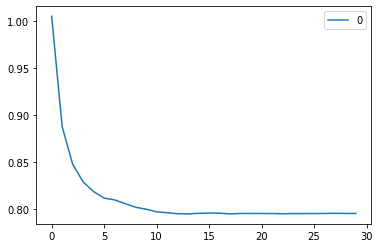

In [669]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [670]:
min_mse_k = min(rmse_val)
min_index = rmse_val.index(min_mse_k)
print(min_index, min_mse_k)

17 0.7945379938434407


In [671]:
neighbor = min_index
knn_model_1 = KNeighborsRegressor(n_neighbors=neighbor).fit(X_train, y_train)

In [672]:
y_train_pred = knn_model_1.predict(X_train)

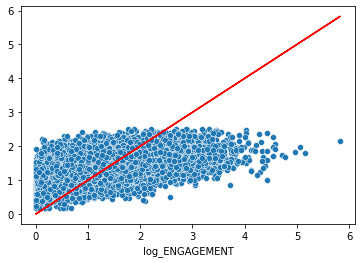

In [673]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [674]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_train[-150:]))), y=y_train[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_train_pred[-150:]))), y=y_train_pred[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

## Validating the Model 

In [675]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

0.7440475855219938

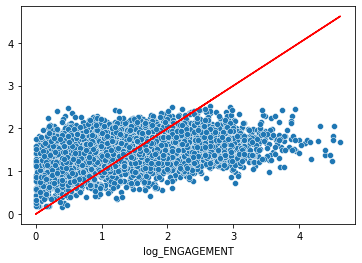

In [676]:
y_test_pred = knn_model_1.predict(X_test)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [677]:
RMSE = mse(y_test, y_test_pred)**0.5
print('RMSE ', RMSE)

print('r2_score: ', round(r2_score(y_test, y_test_pred)*100, 2))

RMSE  0.7953455853179681
r2_score:  11.97


## Scaled MaxAbsScaler model

In [678]:
my_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = pd.DataFrame(my_scaler.transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,FOLLOWER,TIME,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_LIKES,log_COMMENTS,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
0,0.000384,0.991549,0.0,0.0,0.0,0.000000,0.389681,0.283735,1.0,0.333333,0.516129,0.666667,0.173913,0.237288,0.351780,0.294539,0.775475,0.840839,0.800000,0.856533,0.916667,0.900000,0.914286
1,0.000028,0.993253,0.0,1.0,1.0,0.000010,0.256911,0.235613,1.0,0.416667,0.580645,0.166667,0.391304,0.016949,0.003279,0.078471,0.602476,0.647390,0.647619,0.359981,0.750000,0.000000,0.914286
2,0.000060,0.993695,0.0,0.0,0.0,0.000000,0.359321,0.252947,1.0,0.416667,0.838710,0.333333,0.739130,0.050847,0.787362,0.683471,0.009499,0.030194,0.952381,0.177105,0.305556,0.066667,0.914286
3,0.000066,0.998777,0.0,0.0,0.0,0.000000,0.331980,0.228997,1.0,0.666667,0.967742,0.000000,0.739130,0.508475,0.737761,0.750687,0.602476,0.647390,0.647619,0.277035,0.277778,0.066667,0.971429
4,0.000255,0.996926,0.0,1.0,1.0,0.000138,0.382836,0.309419,1.0,0.583333,0.838710,0.000000,0.782609,0.372881,0.003279,0.865878,0.602476,0.647390,0.647619,0.324138,0.055556,0.000000,0.914286


In [679]:
knn_model_2 = KNeighborsRegressor(n_neighbors=10).fit(X_train_scaled, y_train)

In [680]:
y_train_pred = knn_model_2.predict(X_train_scaled)

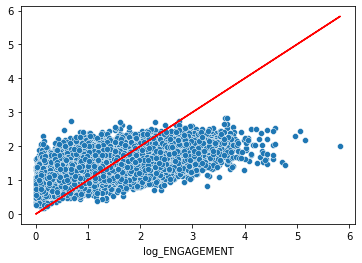

In [681]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [682]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

0.690458157536301

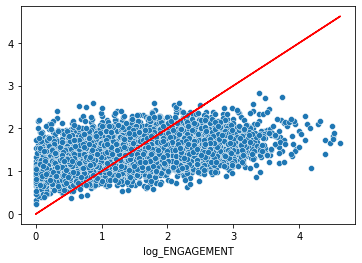

In [683]:
X_test_scaled = my_scaler.transform(X_test)
y_test_pred = knn_model_2.predict(X_test_scaled)

ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [684]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

0.7697740454760434

## Appling 2nd Model - Decision Tree with bins

In [685]:
model_2_dt = DecisionTreeClassifier(
    min_samples_leaf=3
    ,max_depth=5
    )

In [686]:
model_2_dt.fit(X, 
              y_ENGAGEMENT_RANK_INT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [687]:
class_list = [str(x) for x in model_2_dt.classes_]
class_list

['0', '1', '2', '3', '4']

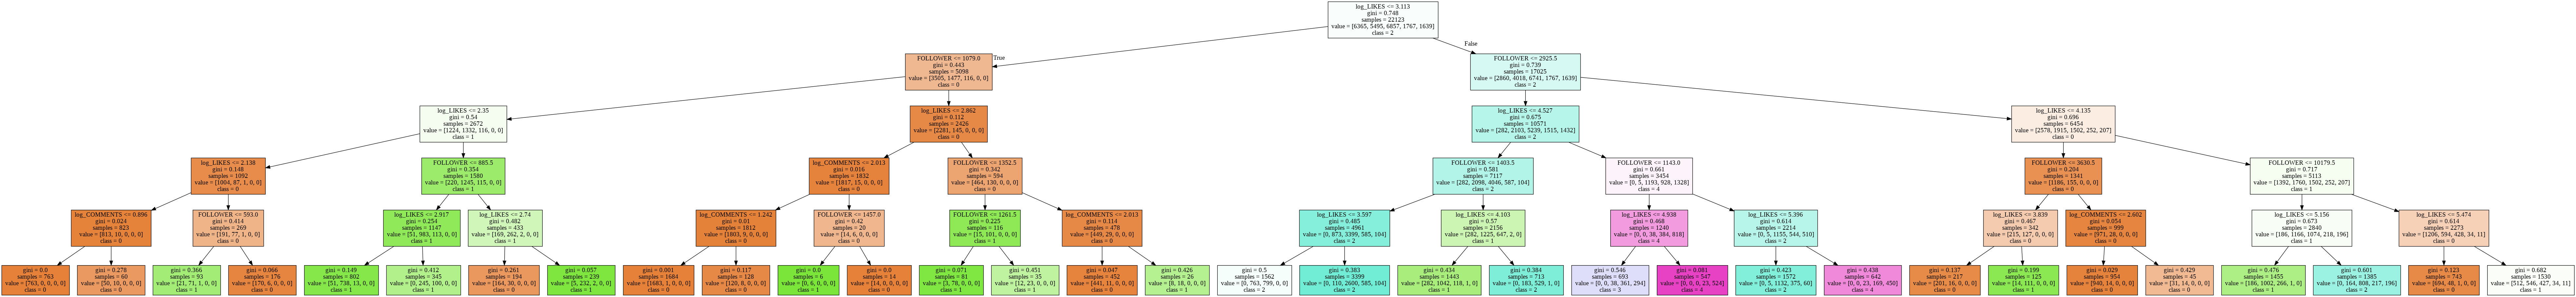

In [688]:
dot_data = StringIO()  
export_graphviz(model_2_dt, out_file=dot_data, feature_names=X.columns, 
                leaves_parallel=True, filled=True, class_names=[str(x) for x in model_2_dt.classes_])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1000) 

View Features Emportance:

In [689]:
pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False).round()

log_LIKES                                       66.0
FOLLOWER                                        34.0
log_COMMENTS                                     0.0
DAY                                              0.0
TIME                                             0.0
COMMENT_DISABLED                                 0.0
IS_VIDEO                                         0.0
HAS_AUDIO                                        0.0
VIDEO_VIEW_COUNT                                 0.0
YEAR                                             0.0
MONTH                                            0.0
IMAGE_LABEL_INTEREST_OBJECT_AS_INT               0.0
ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT     0.0
HOUR                                             0.0
MINUTE                                           0.0
ACCESSIBILITY_CAPTION_OBJECT_AS_INT              0.0
CAPTION_OBJECT_AS_INT                            0.0
LOCATION_OBJECT_AS_INT                           0.0
CITY_OBJECT_AS_INT                            

Eladk 2021-Sep-24 comment in first model:

*   Why Time is So meaning full?
*   What ACCESSIBILITY_CAPTION have corolation with ranking?
*   I Need to understand why folloer is very meaningfull
*   I Need to understand why USERNAME,userid is very meaningfull

In [690]:
df.head(3)

,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,log_LIKES,log_COMMENTS,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,1052,23,0,2.19,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,Null,Null,Null,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,0,0,0,0.0,1.160021,3.178054,0.000000,2021-03-16 10:39:23,2021,3,16,1,10,39,Medium,Low,Medium,1,0,1,4132.0,6111.0,2093.0,1265.0,68.0,5074.0,12.0,19.0,5.0
1920,649,138,2,21.57,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,Null,Null,Null,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,0,0,0,0.0,3.116622,4.934474,1.098612,2020-07-18 19:54:09,2020,7,18,5,19,54,High,Medium,Extreme,2,1,4,377.0,17407.0,2093.0,1265.0,68.0,3402.0,12.0,2.0,32.0
1922,1103,46,4,4.53,Photo by Mohamed Amine in Mawazine.,Null,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, Accessories, Accessory, Face, Scarf, Portrait, Photography, Photo, Glasses, People, Selfie, Female, Coat, Smile",Null,news,style_fashion,0,0,0,0.0,1.710188,3.850148,1.609438,2019-09-07 00:15:33,2019,9,7,5,0,15,High,Medium,High,2,1,2,8330.0,11576.0,1818.0,915.0,96.0,4328.0,0.0,21.0,32.0


In [691]:
df['ENGAGEMENT_RANK_INT_pred'] = model_2_dt.predict(X)
df.head(3)

,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,log_LIKES,log_COMMENTS,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT,ENGAGEMENT_RANK_INT_pred
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,1052,23,0,2.19,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,Null,Null,Null,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,0,0,0,0.0,1.160021,3.178054,0.000000,2021-03-16 10:39:23,2021,3,16,1,10,39,Medium,Low,Medium,1,0,1,4132.0,6111.0,2093.0,1265.0,68.0,5074.0,12.0,19.0,5.0,2
1920,649,138,2,21.57,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,Null,Null,Null,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,0,0,0,0.0,3.116622,4.934474,1.098612,2020-07-18 19:54:09,2020,7,18,5,19,54,High,Medium,Extreme,2,1,4,377.0,17407.0,2093.0,1265.0,68.0,3402.0,12.0,2.0,32.0,3
1922,1103,46,4,4.53,Photo by Mohamed Amine in Mawazine.,Null,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, Accessories, Accessory, Face, Scarf, Portrait, Photography, Photo, Glasses, People, Selfie, Female, Coat, Smile",Null,news,style_fashion,0,0,0,0.0,1.710188,3.850148,1.609438,2019-09-07 00:15:33,2019,9,7,5,0,15,High,Medium,High,2,1,2,8330.0,11576.0,1818.0,915.0,96.0,4328.0,0.0,21.0,32.0,2


In [692]:
s = pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False)

s[s.gt(0)]

log_LIKES       65.886672
FOLLOWER        33.701378
log_COMMENTS     0.411950
dtype: float64

In [693]:
# map_dict_ENGAGEMENT = dict(zip(df.ENGAGEMENT_RANK_INT,df.ENGAGEMENT_RANK))
# map_dict_ENGAGEMENT

In [694]:
#df['ENGAGEMENT_RANK_pred'] = df['ENGAGEMENT_RANK_INT_pred'].map(map_dict_ENGAGEMENT)

Evanuating the Model:

In [695]:
#type(df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_pred']].value_counts())

In [696]:
df[['ENGAGEMENT_RANK_INT','ENGAGEMENT_RANK_INT_pred']].value_counts().sort_index()

ENGAGEMENT_RANK_INT  ENGAGEMENT_RANK_INT_pred
0                    0                           5271
                     1                           1094
1                    0                            158
                     1                           4112
                     2                           1225
2                    0                              1
                     1                            927
                     2                           5868
                     3                             38
                     4                             23
3                    1                             36
                     2                           1178
                     3                            361
                     4                            192
4                    1                             11
                     2                            360
                     3                            294
                     4              

In [697]:
#df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_pred']].value_counts().sort_index()

In [698]:
cm = confusion_matrix(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred)
pd.DataFrame(cm,
             index=model_2_dt.classes_,
             columns=model_2_dt.classes_)

,0,1,2,3,4
0,5271,1094,0,0,0
1,158,4112,1225,0,0
2,1,927,5868,38,23
3,0,36,1178,361,192
4,0,11,360,294,974


In [699]:
print(classification_report(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6365
           1       0.67      0.75      0.70      5495
           2       0.68      0.86      0.76      6857
           3       0.52      0.20      0.29      1767
           4       0.82      0.59      0.69      1639

    accuracy                           0.75     22123
   macro avg       0.73      0.65      0.67     22123
weighted avg       0.76      0.75      0.74     22123



In [700]:
accuracy_score(y_true=df.ENGAGEMENT_RANK_INT, y_pred=df.ENGAGEMENT_RANK_INT_pred)

0.7497174885865389

In [701]:
s = pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False)

s[s.gt(0)]

log_LIKES       65.886672
FOLLOWER        33.701378
log_COMMENTS     0.411950
dtype: float64

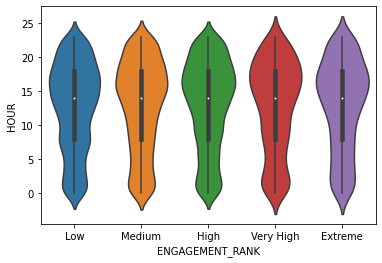

In [702]:
p = sns.violinplot(x='ENGAGEMENT_RANK', y='HOUR', 
                    #order=cut_order, 
                    data=df)

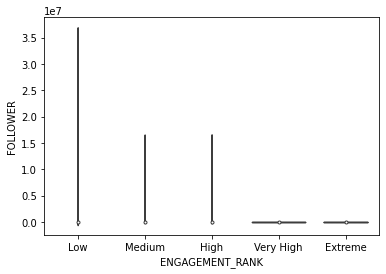

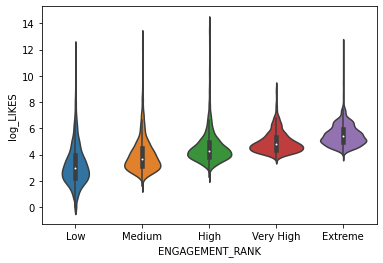

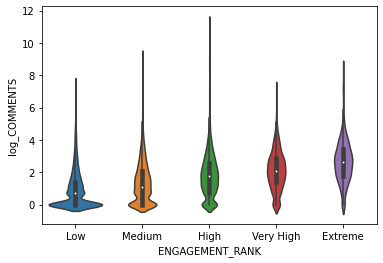

In [703]:
for index, val in pd.Series(model_2_dt.feature_importances_*100,index=X.columns).iteritems():
  if val > 0:
    plt.figure()
    p = sns.violinplot(x='ENGAGEMENT_RANK', y=index, 
                    #order=cut_order, 
                    data=df)
    

## Scoring 

## Appling 3nd Model - Random Forest regression

In [704]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = rand_state)
# Train the model on training data
rf.fit(X_train, y_train);

KeyboardInterrupt: ignored

In [ ]:
# Use the forest's predict method on the test data
rf_predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'log_of_enegament.')

In [ ]:
ax = sns.scatterplot(x=y_test, y=rf_predictions)
ax.plot(y_train, y_train, 'r')

In [ ]:
x = np.linspace(0, len(y_test), len(y_test))
fig = plt.figure(figsize=(9, 10))
plt.plot(x, y_test, label='y_test')
plt.plot(x, rf_predictions, label='y_prep')
plt.xlabel('index')
plt.ylabel('log_engament')
plt.legend()
plt.show()

In [ ]:
rf_y_train_pred = rf.predict(X_train)
RMSE = mse(y_train, rf_y_train_pred)**0.5
RMSE

In [ ]:
rf_y_test_pred = rf.predict(X_test)
RMSE = mse(y_test, rf_y_test_pred)**0.5
RMSE


In [ ]:
pd.Series(rf.feature_importances_, index=X_train.columns).\
sort_values(ascending=False)

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
#Model Performance
#Average Error: 3.6561 degrees.
#Accuracy = 93.83%.
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
#Improvement of 0.50%.

In [ ]:
grid_search.best_params_

## Appling 4nd Model - Random Forest Classification 

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_ENGAGEMENT_RANK_INT, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [ ]:
X_train_4.drop(columns='VIDEO_VIEW_COUNT', inplace=True)
X_test_4.drop(columns='VIDEO_VIEW_COUNT', inplace=True)

In [ ]:
X_train_4.columns

In [ ]:
model_rf_4 = RandomForestClassifier()

model_rf_4.fit(X_train_4,y_train_4) # X_test_4 is Engagment_rank
preds= model_rf_4.predict_proba(X_train_4)[:,1]

#roc_auc_score(y_test_4,preds)

In [ ]:
# map_dict_ENGAGEMENT = dict(zip(df.ENGAGEMENT_RANK_INT,df.ENGAGEMENT_RANK))

In [ ]:
pd.Series(model_rf_4.feature_importances_*100, index=X_train_4.columns).sort_values(ascending=False).round()#.plot.barh(figsize=(14,12))

In [ ]:
from sklearn import tree

In [ ]:
import six

In [ ]:
_ = tree.plot_tree(model_rf_4.estimators_[0], feature_names=X_train_4.columns, filled=True)

In [ ]:
X_train_4.columns

In [ ]:
X_train_4.head(3)

In [ ]:
X_train_4['y_ENGAGEMENT_RANK_INT_pred_rf'] = model_rf_4.predict(X_train_4)

In [ ]:
X_train_4.head(3)

In [ ]:
X_train_4 = pd.concat([X_train_4, y_train_4], axis=1).reset_index()

In [ ]:
X_train_4.head(3)

In [ ]:
print(len(X_train_4))

In [ ]:
len(X_train_4[X_train_4.y_ENGAGEMENT_RANK_INT_pred_rf == X_train_4.ENGAGEMENT_RANK_INT])

In [ ]:
cm = confusion_matrix(y_true=y_train_4,
                      y_pred=X_train_4['y_ENGAGEMENT_RANK_INT_pred_rf'])
pd.DataFrame(cm,
             index=model_rf_4.classes_,
             columns=model_rf_4.classes_)

In [ ]:
X_train_4.columns

In [ ]:
print(classification_report(y_true=y_train_4,
                      y_pred=X_train_4.y_ENGAGEMENT_RANK_INT_pred_rf))

**WTF!!!**

In [ ]:
print(classification_report(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred))

In [ ]:
X_test_4.columns

In [ ]:
X_test_4.head(3)

In [ ]:
X_test_4['y_ENGAGEMENT_RANK_INT_pred'] = model_rf_4.predict(X_test_4)

In [ ]:
X_test_4.head(3)

In [ ]:
#pd.concat([X_test_4, df4.reindex(df1.index)], axis=1)
X_test_4 = pd.concat([X_test_4, y_test_4], axis=1).reindex(X_test_4.index)

In [ ]:
X_test_4.head(3)

In [ ]:
X_test_4[['ENGAGEMENT_RANK_INT','y_ENGAGEMENT_RANK_INT_pred']].value_counts().sort_index()

In [ ]:
cm = confusion_matrix(y_true=X_test_4.ENGAGEMENT_RANK_INT,
                      y_pred=X_test_4.y_ENGAGEMENT_RANK_INT_pred)
pd.DataFrame(cm,
             index=model_2_dt.classes_,
             columns=model_2_dt.classes_)

In [ ]:
print(classification_report(y_test_4,
                      y_pred=X_test_4.y_ENGAGEMENT_RANK_INT_pred))

Visualize the Random Forest:

In [ ]:
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in model_rf_4.estimators_:
#   if (i_tree <1):        
#       export_graphviz(model_rf_4,
#                   feature_names=X_train_4.columns,
#                   filled=True,
#                   rounded=True)
#       pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
#       i_tree = i_tree + 1

## Appling 4nd Model - XGBoost regression


In [705]:
XGB_reg = xgb.XGBRegressor()

In [706]:
print(XGB_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [707]:
XGB_reg.fit(X_train, y_train)

[20:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [708]:
score = XGB_reg.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9932296765883446


In [709]:
scores = cross_val_score(XGB_reg, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[20:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [710]:
y_test_pred = XGB_reg.predict(X_test)
mse = mse(y_test, y_test_pred)
score_test = XGB_reg.score(X_test, y_test)  
print("Training score: ", score_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**0.5))


Training score:  0.9929576007495198
MSE: 0.01
RMSE: 0.07


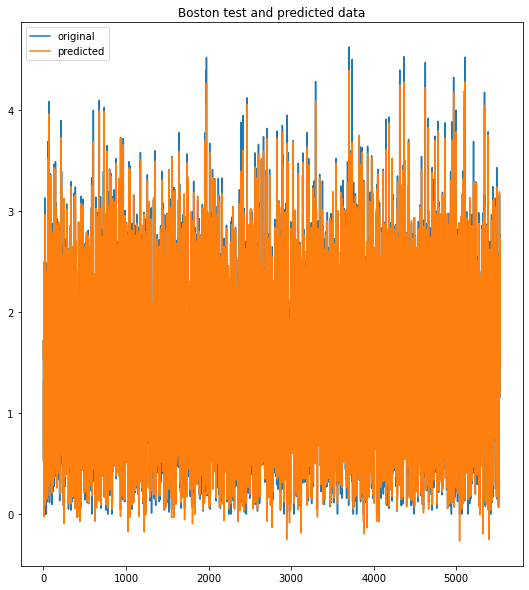

In [711]:
x_ax = range(len(y_test))
fig = plt.figure(figsize=(9, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [ ]:
XGB_param_grid = {'colsample_bytree': [0.3, 0.7, 1.0, 1.2],
    'n_estimators': [50,100,200],    'max_depth': [2,3,4]
}
XGB_reg_grid = xgb.XGBRegressor()
grid_mse = GridSearchCV(param_grid=XGB_param_grid, estimator=XGB_reg_grid, 
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[20:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[20:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re